Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
✅ Models Trained Successfully!


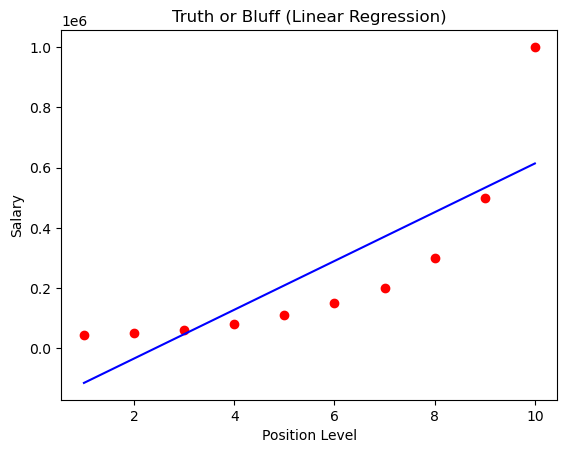

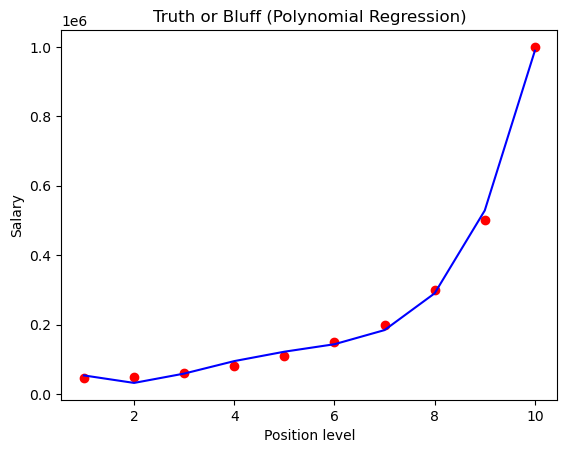

C:\Users\SM KAIF\AppData\Local\Temp\ipykernel_14892\1212969550.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


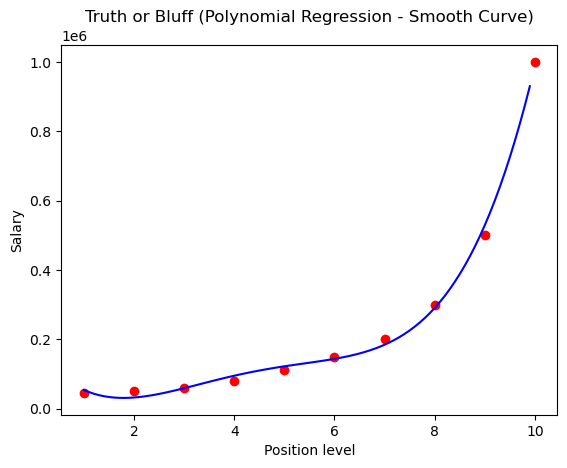

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265153]


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 
# Once mounted, navigate to the folder
# Example path (adjust based on your structure)
path = 'Position_Salaries (1).csv'
# Importing the dataset
dataset = pd.read_csv(path)
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 

# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

 
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")
 
 
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 

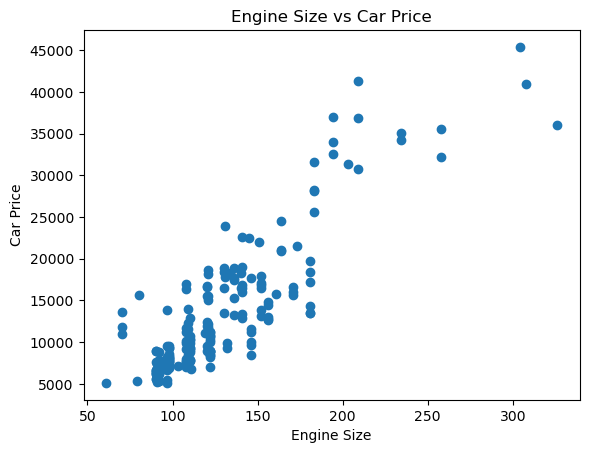

c:\Users\SM KAIF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\SM KAIF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SM KAIF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SM KAIF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SM KAIF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


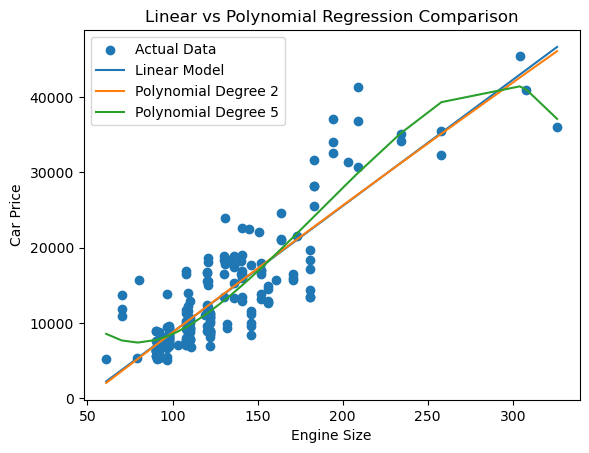

Prediction for Engine Size = 200
Linear Model: 25534.237747489227
Polynomial Degree 2: 25591.791708947312
Polynomial Degree 5: 27929.131554038133

Model Performance Metrics

Linear Regression
MSE: 14980261.40555132
RMSE: 3870.4342657576967
R² Score: 0.7641291357806176
Accuracy (±10%): 0.3024390243902439

Polynomial Degree 2
MSE: 14973637.600078518
RMSE: 3869.5784783459967
R² Score: 0.7642334305374976
Accuracy (±10%): 0.3073170731707317

Polynomial Degree 5
MSE: 13068145.688943226
RMSE: 3614.98903026596
R² Score: 0.7942362463545813
Accuracy (±10%): 0.3073170731707317

Business Interpretation:
1. Linear regression underfits non-linear pricing trends.
2. Polynomial Degree 2 balances accuracy and stability.
3. Polynomial Degree 5 achieves high accuracy but risks overfitting.
4. Degree 2 is recommended for pricing decisions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset

df = pd.read_csv("CarPrice_Assignment.csv")

# 2. Select features and target

X = df[["enginesize"]]
y = df["price"]

# 3. Visualization

plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()

# Helper Function: Regression Accuracy (±10%)

def regression_accuracy(y_true, y_pred, tolerance=0.10):
    return np.mean(np.abs(y_true - y_pred) / y_true <= tolerance)

# 4. Linear Regression

linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred_linear = linear_model.predict(X)

mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y, y_pred_linear)
acc_linear = regression_accuracy(y, y_pred_linear)

engine_200 = np.array([[200]])
price_linear_200 = linear_model.predict(engine_200)

# 5. Polynomial Regression (Degree 2)

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y)

y_pred_poly2 = poly2_model.predict(X_poly2)

mse_poly2 = mean_squared_error(y, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y, y_pred_poly2)
acc_poly2 = regression_accuracy(y, y_pred_poly2)

price_poly2_200 = poly2_model.predict(poly2.transform(engine_200))

# 6. Polynomial Regression (Degree 5)

poly5 = PolynomialFeatures(degree=5)
X_poly5 = poly5.fit_transform(X)

poly5_model = LinearRegression()
poly5_model.fit(X_poly5, y)

y_pred_poly5 = poly5_model.predict(X_poly5)

mse_poly5 = mean_squared_error(y, y_pred_poly5)
rmse_poly5 = np.sqrt(mse_poly5)
r2_poly5 = r2_score(y, y_pred_poly5)
acc_poly5 = regression_accuracy(y, y_pred_poly5)

price_poly5_200 = poly5_model.predict(poly5.transform(engine_200))

# 7. Plot Model Comparison

X_sorted = X.sort_values(by="enginesize")
X_sorted_np = X_sorted.values

plt.scatter(X, y, label="Actual Data")
plt.plot(X_sorted_np, linear_model.predict(X_sorted), label="Linear Model")
plt.plot(
    X_sorted_np,
    poly2_model.predict(poly2.transform(X_sorted_np)),
    label="Polynomial Degree 2"
)
plt.plot(
    X_sorted_np,
    poly5_model.predict(poly5.transform(X_sorted_np)),
    label="Polynomial Degree 5"
)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression Comparison")
plt.legend()
plt.show()

# 8. Results

print("Prediction for Engine Size = 200")
print("Linear Model:", price_linear_200[0])
print("Polynomial Degree 2:", price_poly2_200[0])
print("Polynomial Degree 5:", price_poly5_200[0])

print("\nModel Performance Metrics")

print("\nLinear Regression")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R² Score:", r2_linear)
print("Accuracy (±10%):", acc_linear)

print("\nPolynomial Degree 2")
print("MSE:", mse_poly2)
print("RMSE:", rmse_poly2)
print("R² Score:", r2_poly2)
print("Accuracy (±10%):", acc_poly2)

print("\nPolynomial Degree 5")
print("MSE:", mse_poly5)
print("RMSE:", rmse_poly5)
print("R² Score:", r2_poly5)
print("Accuracy (±10%):", acc_poly5)


# 9. Business Interpretation


print("\nBusiness Interpretation:")
print("1. Linear regression underfits non-linear pricing trends.")
print("2. Polynomial Degree 2 balances accuracy and stability.")
print("3. Polynomial Degree 5 achieves high accuracy but risks overfitting.")
print("4. Degree 2 is recommended for pricing decisions.")


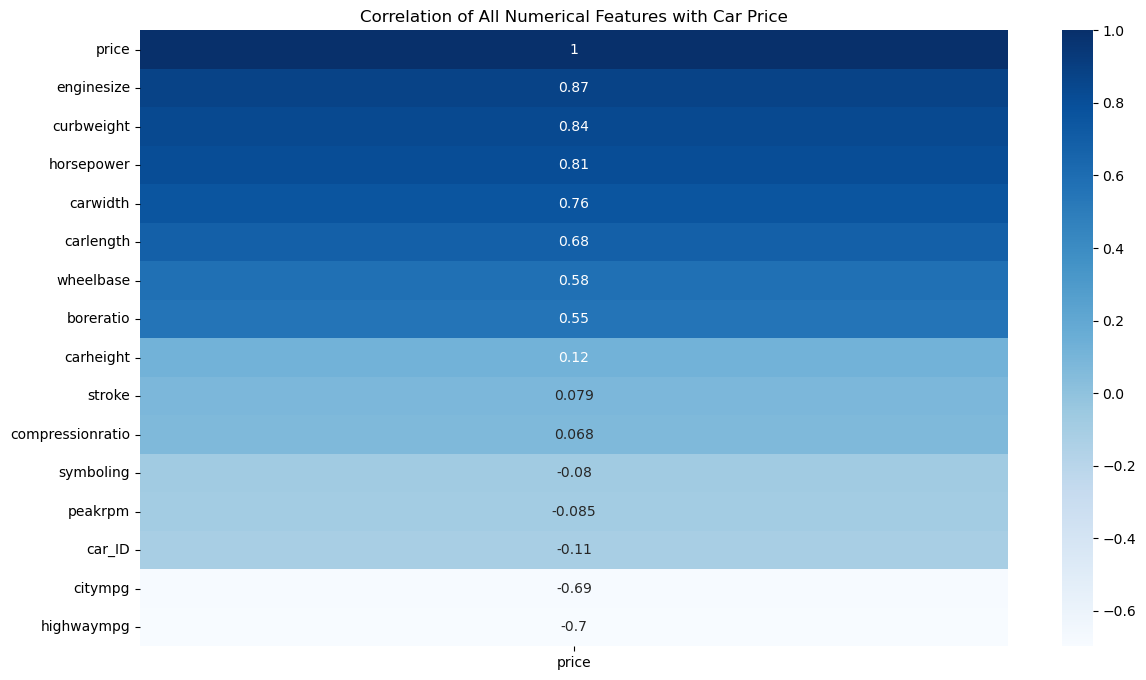

In [3]:
# Heatmap: All Columns w.r.t Target (price)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    corr_matrix[["price"]].sort_values(by="price", ascending=False),
    annot=True,cmap="Blues"
)
plt.title("Correlation of All Numerical Features with Car Price")
plt.show()

### Key Insights from the Analysis (Target: Car Price)

- **Engine size strongly influences price**: larger engines generally lead to higher car prices, especially in the mid-range segment.  
- **Performance drives premium pricing**: horsepower and curb weight also show strong positive relationships with price.  
- **Fuel efficiency has an inverse effect**: cars with higher city and highway mileage tend to be lower priced.  
- **Price growth slows at high engine sizes**: luxury saturation causes diminishing returns for very large engines.  
- **Engine size alone is informative but not sufficient**: incorporating multiple features would improve pricing accuracy and business decisions.

Relationship Between Numerical Features and Car Price

Engine Size — Strong Positive
Larger engines are a major driver of higher prices, reflecting increased power and performance.

Horsepower — Strong Positive
Higher horsepower strongly correlates with premium pricing, as performance is a key value driver.

Curb Weight — Strong Positive
Heavier vehicles often indicate stronger build quality, safety features, and luxury, leading to higher prices.

Car Width — Moderate to Strong Positive
Wider cars are typically positioned as premium models, contributing significantly to price.

Car Length — Moderate Positive
Longer vehicles generally cost more, though length alone is not a decisive pricing factor.

Wheelbase — Moderate Positive
A longer wheelbase improves ride comfort and stability, moderately influencing price.

Bore Ratio — Moderate Positive
Reflects engine efficiency and performance characteristics, with a noticeable but not dominant impact on price.

Stroke — Weak Positive
Has limited influence on pricing compared to other engine-related metrics.

Compression Ratio — Weak Positive
Only a minor contributor to price variation.

Peak RPM — Weak Positive
Engine RPM capability shows minimal direct impact on vehicle pricing.

City MPG — Strong Negative
Higher fuel efficiency is typically associated with economy cars, which tend to be lower priced.

Highway MPG — Strong Negative
Similar to city MPG, higher mileage generally correlates with lower vehicle prices.

Symboling — Weak Negative
Risk rating has little effect on pricing decisions.

Height — Weak Positive
Vehicle height alone does not significantly influence price.

Number of Doors — Weak Positive
Door count plays a minor role compared to performance and size attributes.


* **enginesize:** Strong positive
* **horsepower:** Strong positive
* **curbweight:** Strong positive
* **carwidth:** Moderate to strong positive
* **carlength:** Moderate positive
* **wheelbase:** Moderate positive
* **boreratio:** Moderate positive
* **stroke:** Weak positive
* **compressionratio:** Weak positive
* **peakrpm:** Weak positive
* **citympg:** Strong negative
* **highwaympg:** Strong negative
* **symboling:** Weak negative
* **height:** Weak positive
* **numofdoors:** Weak positive


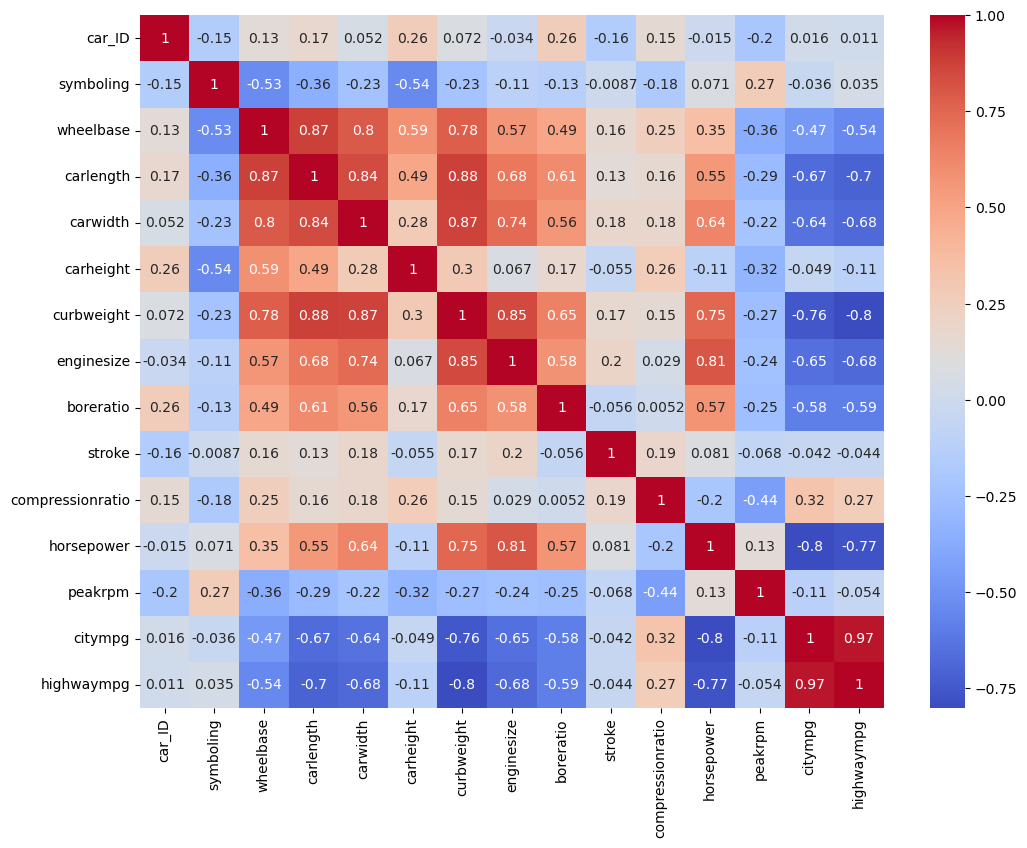

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
x=df.drop('price',axis=1)
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
 

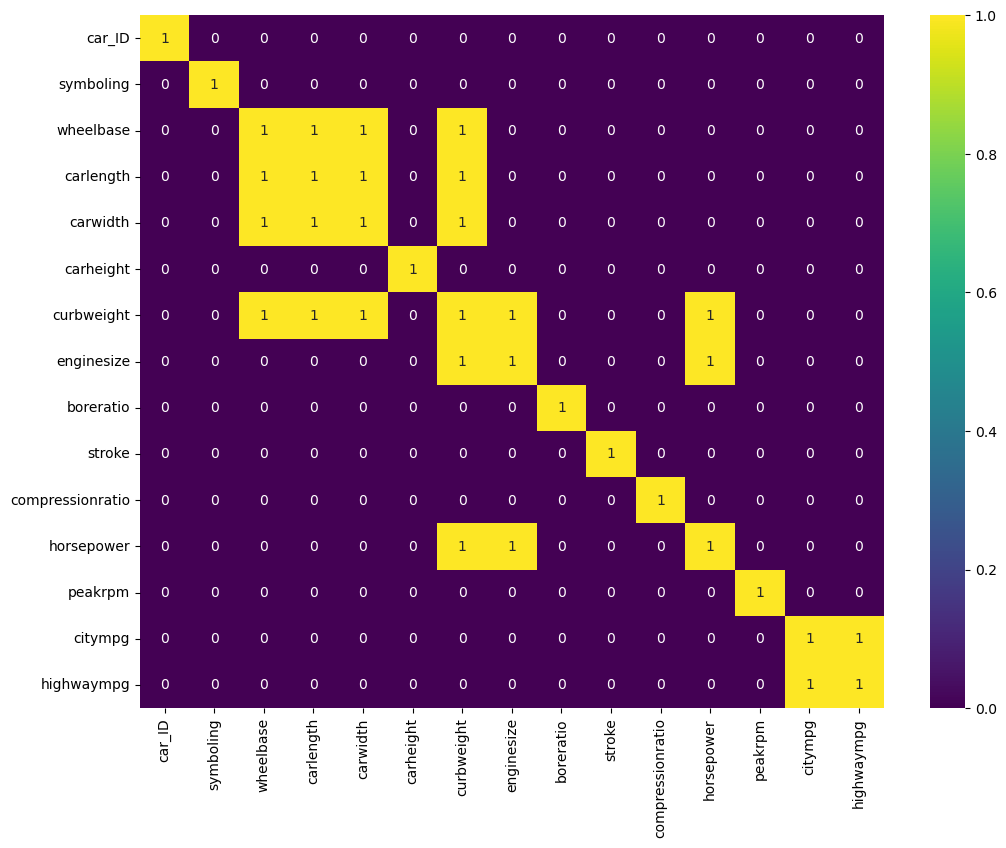

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='viridis')
plt.show()

In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Drop target if needed (X features only)
X_features = numeric_df.drop(columns=["price"], errors="ignore")

# Compute correlation matrix
corr_matrix = X_features.corr()

# Get pairs with correlation > 0.75 (excluding self-correlation)
high_corr_pairs = []
threshold = 0.75

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 round(corr_value, 2))
            )

# Convert to DataFrame for clean view
high_corr_df = pd.DataFrame(
    high_corr_pairs,
    columns=["Feature 1", "Feature 2", "Correlation Value"]
)

print(high_corr_df)

     Feature 1   Feature 2  Correlation Value
0    carlength   wheelbase               0.87
1     carwidth   wheelbase               0.80
2     carwidth   carlength               0.84
3   curbweight   wheelbase               0.78
4   curbweight   carlength               0.88
5   curbweight    carwidth               0.87
6   enginesize  curbweight               0.85
7   horsepower  curbweight               0.75
8   horsepower  enginesize               0.81
9      citympg  curbweight              -0.76
10     citympg  horsepower              -0.80
11  highwaympg  curbweight              -0.80
12  highwaympg  horsepower              -0.77
13  highwaympg     citympg               0.97


In [7]:
unique_columns_from_pairs = pd.unique(
    high_corr_df[["Feature 1", "Feature 2"]].values.ravel()
)

print("Unique column names from highly correlated pairs:")
print(list(unique_columns_from_pairs))

Unique column names from highly correlated pairs:
['carlength', 'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")
# Drop specified columns
cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² Score (Train):", round(r2_train, 3))
print("R² Score (Test):", round(r2_test, 3))

R² Score (Train): 0.843
R² Score (Test): 0.853


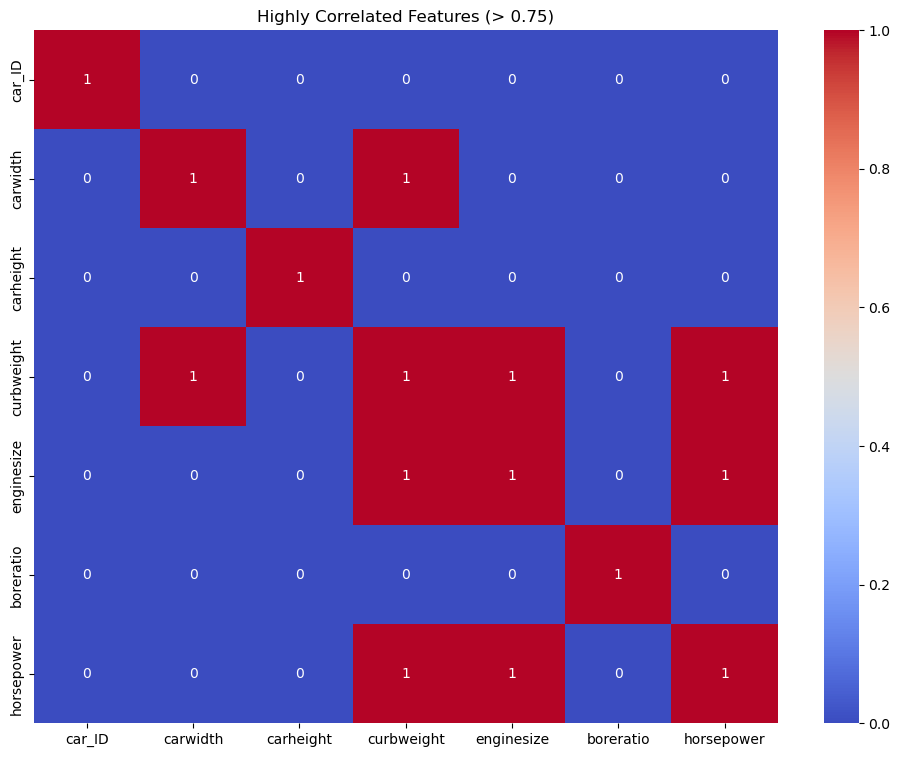

In [9]:
x = df.drop(
    ['symboling', 'peakrpm', 'stroke', 'compressionratio', 'price'],
    axis=1,
    errors='ignore'
)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
sns.heatmap(
    x.corr(numeric_only=True) > 0.75,
    annot=True,
    cmap='coolwarm'
)
plt.title("Highly Correlated Features (> 0.75)")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# ------------------------------------------------
# 1. Load dataset
# ------------------------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# Drop specified columns
cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

# Use numerical columns only
numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

# ------------------------------------------------
# 2. Train-test split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------
# 3. Feature scaling
# ------------------------------------------------
scaler = StandardScaler()
x_tran = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# ------------------------------------------------
# 4. RidgeCV using your exact lines
# ------------------------------------------------
alphas = np.arange(0.1, 10, 0.05)

from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=alphas)

model.fit(x_tran, y_train)

# ------------------------------------------------
# 5. Best alpha and evaluation
# ------------------------------------------------
print("Best alpha selected by RidgeCV:", model.alpha_)

y_train_pred = model.predict(x_tran)
y_test_pred = model.predict(x_test)

print("R² Score (Train):", round(r2_score(y_train, y_train_pred), 3))
print("R² Score (Test):", round(r2_score(y_test, y_test_pred), 3))

Best alpha selected by RidgeCV: 9.950000000000003
R² Score (Train): 0.842
R² Score (Test): 0.847


In [11]:
from sklearn.linear_model import RidgeCV

import numpy as np

model=RidgeCV(alphas=alphas)

alphas=np.arange(0.1,10,0.05)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 9.950000000000003
best score:  0.8505906164859123


In [12]:
from sklearn.linear_model import LassoCV

import numpy as np

model=LassoCV(alphas=alphas)

alphas=np.arange(0.1,10,0.05)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 9.950000000000003
best score:  0.8523277972620782
